In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [53]:
data=pd.read_csv('googleplaystore.csv')

In [54]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [55]:
data.shape

(10841, 13)

In [56]:
data.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

In [57]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [58]:
outlier=data[data['Rating']>5]
outlier

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [59]:
data.drop(10472,inplace=True)

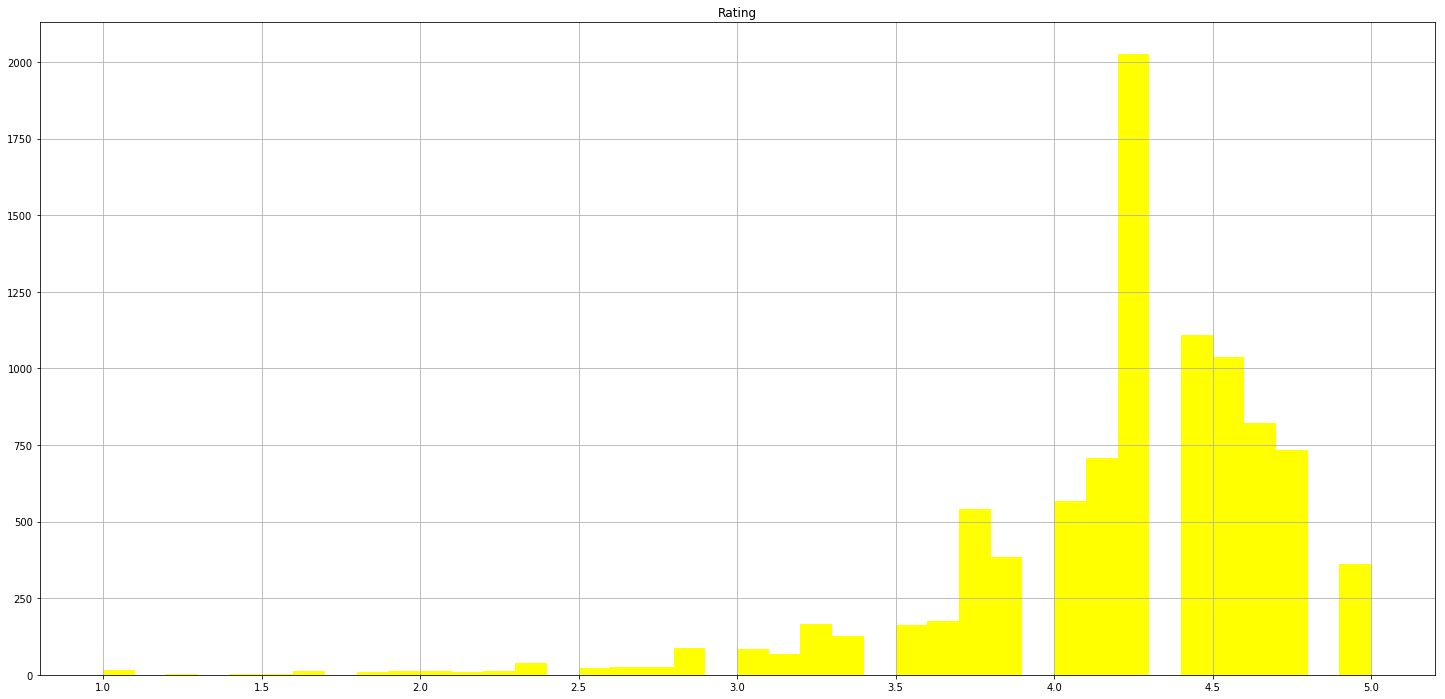

In [60]:
data.hist(bins=40,color='yellow')
plt.show()

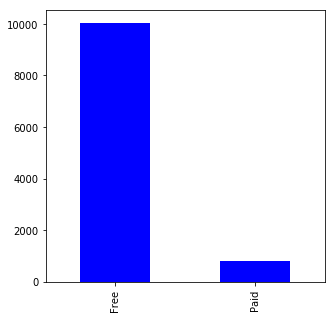

In [61]:
plt.figure(figsize=(5,5))
data['Type'].value_counts().plot.bar(color='blue')
plt.show()

In [62]:
plt.rcParams['figure.figsize']=(12,6)

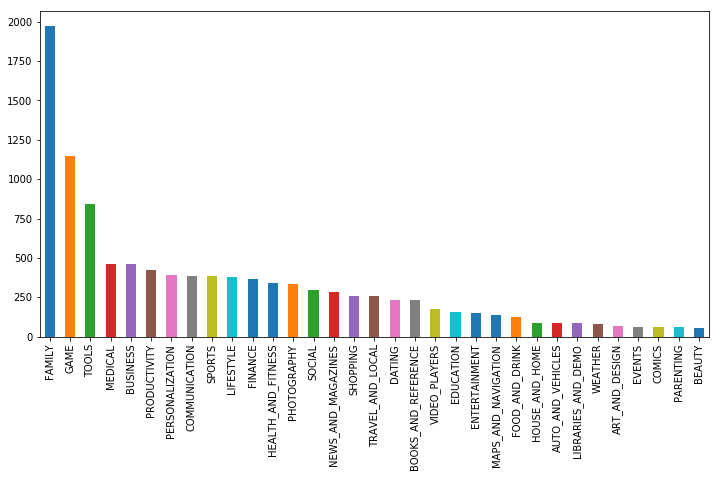

In [63]:
data['Category'].value_counts().plot.bar()
plt.show()

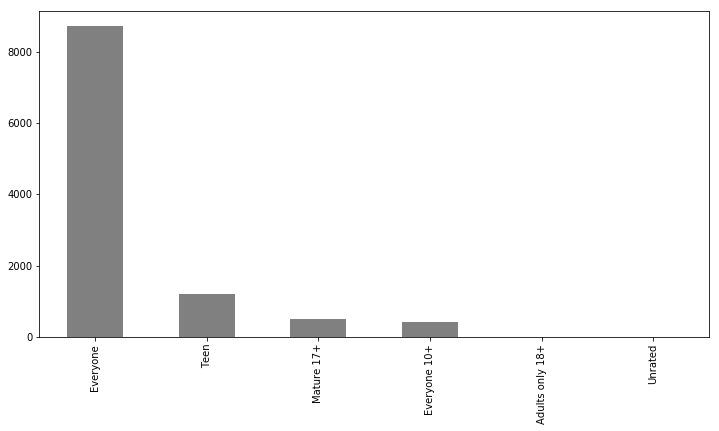

In [64]:
data['Content Rating'].value_counts().plot.bar(color='gray')

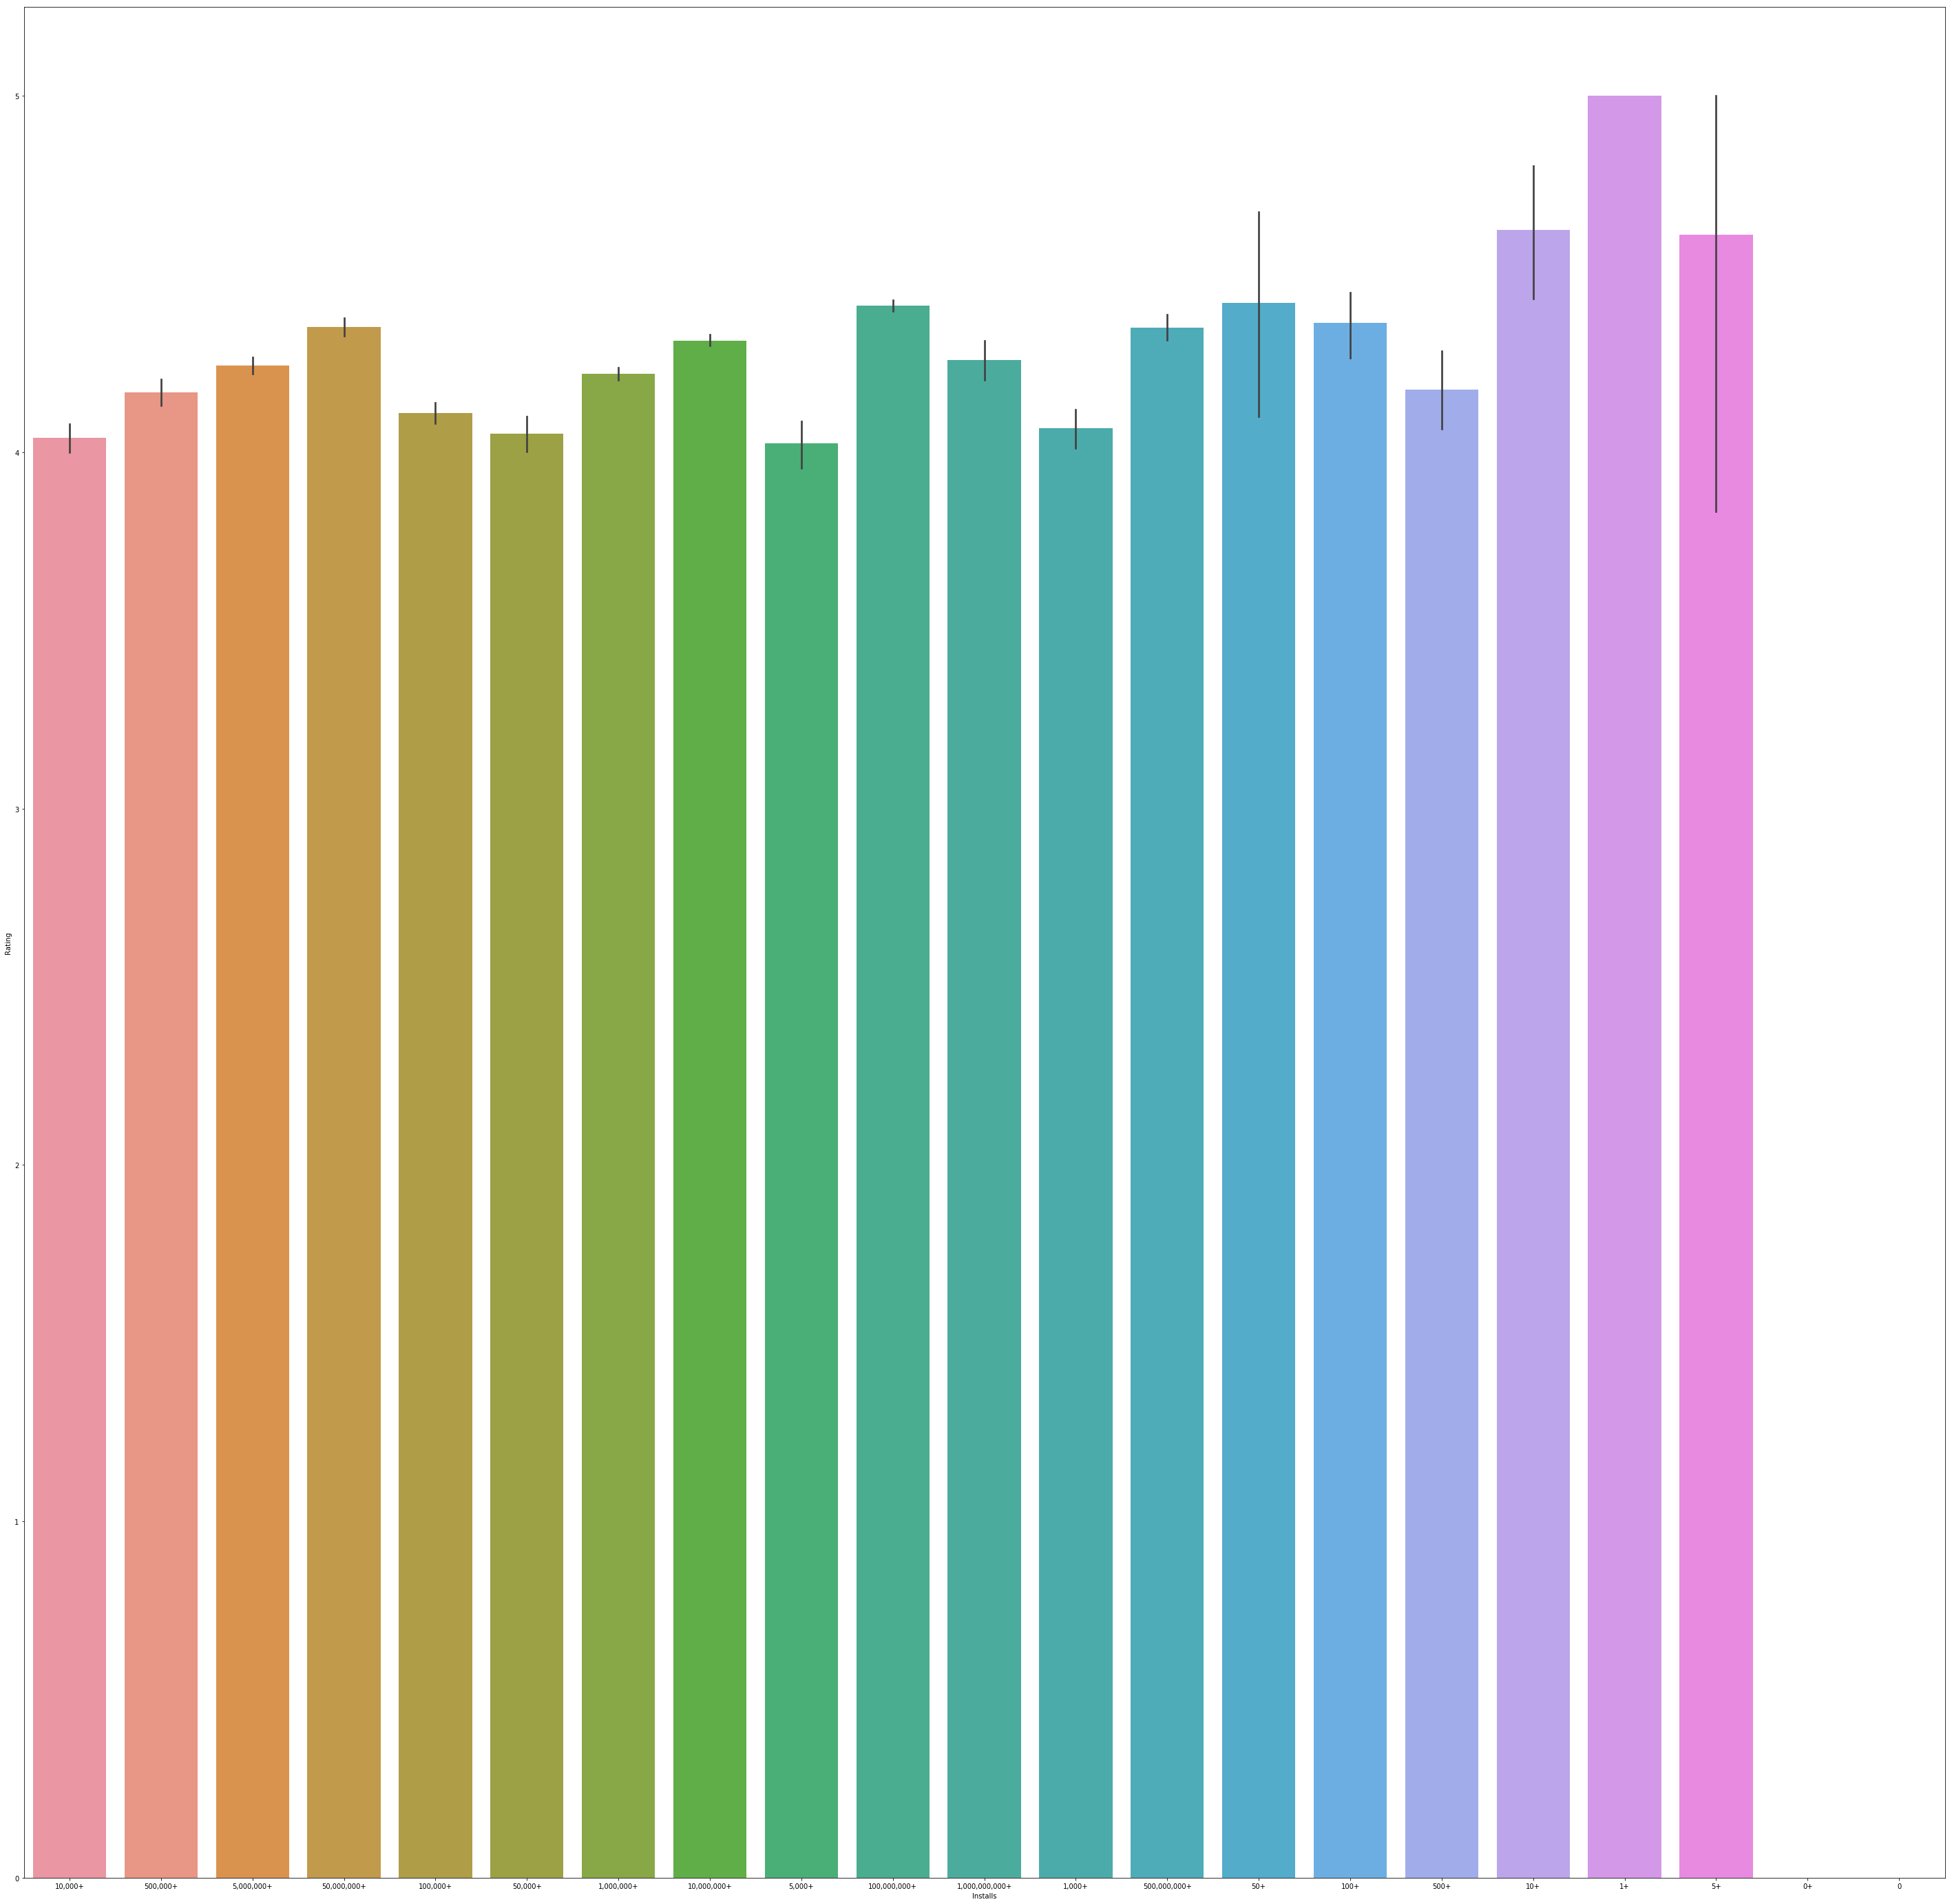

In [65]:
plt.figure(figsize=(50,50))
sns.barplot(x='Installs',y='Rating',data=data)
plt.show()

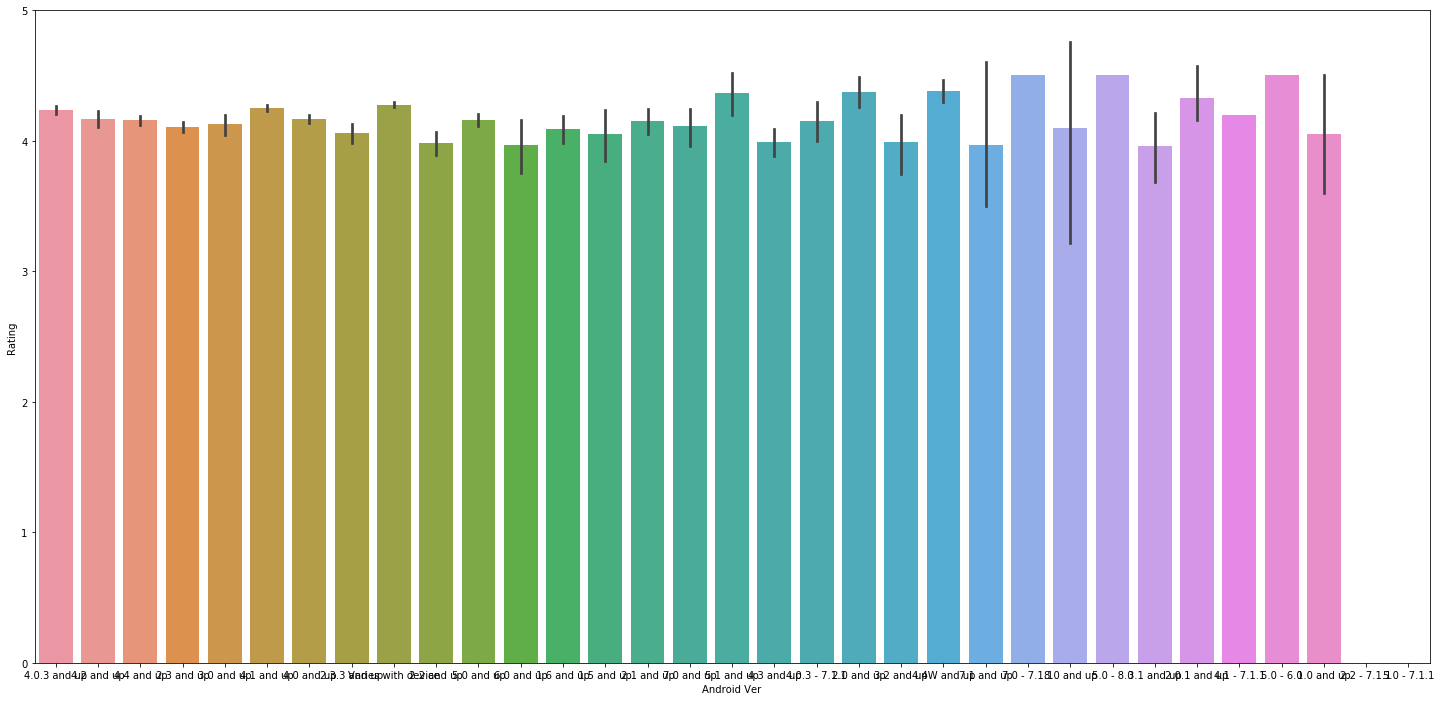

In [66]:
plt.rcParams['figure.figsize']=(25,12)
sns.barplot(x='Android Ver',y='Rating',data=data)
plt.show()

In [67]:
category=pd.get_dummies(data['Category'],drop_first=True)
types=pd.get_dummies(data['Type'],drop_first=True)
content=pd.get_dummies(data['Content Rating'],drop_first=True)
new=[data,category,types]
data=pd.concat(new,axis=1)
data.drop(['Category','Installs','Type','Content Rating'],axis=1,inplace=True)

In [68]:
data.shape

(10840, 42)

In [69]:
data.head()

,App,Rating,Reviews,Size,Price,Genres,Last Updated,Current Ver,Android Ver,AUTO_AND_VEHICLES,...,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER,Paid
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19M,0,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0,...,0,0,0,0,0,0,0,0,0,0
1,Coloring book moana,3.9,967,14M,0,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0,...,0,0,0,0,0,0,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8.7M,0,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0,...,0,0,0,0,0,0,0,0,0,0
3,Sketch - Draw & Paint,4.5,215644,25M,0,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0,...,0,0,0,0,0,0,0,0,0,0
4,Pixel Draw - Number Art Coloring Book,4.3,967,2.8M,0,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
data.drop(['App','Size','Price','Genres','Last Updated','Current Ver','Android Ver'],axis=1,inplace=True)

In [71]:
data.head()

,Rating,Reviews,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,...,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER,Paid
0,4.1,159,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,967,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,87510,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.5,215644,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,967,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
X=data.drop('Rating',axis=1)
y=data['Rating'].values
y=y.astype('int')

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=102)

In [75]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
logr=LogisticRegression()

In [78]:
model=logr.fit(X_train,y_train)

In [79]:
prediction=model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction)

array([[   0,    0,    0,    0,  445,    0],
       [   0,    0,    0,    0,   18,    0],
       [   0,    0,    0,    0,   80,    0],
       [   0,    0,    0,    0,  512,    0],
       [   0,    0,    0,    0, 2125,    0],
       [   0,    0,    0,    0,   72,    0]], dtype=int64)

In [80]:
from sklearn.tree import DecisionTreeClassifier

In [81]:
dtc=DecisionTreeClassifier(random_state=123,criterion='entropy')

In [82]:
model=dtc.fit(X_train,y_train)

In [83]:
prediction=model.predict(X_test)

In [84]:
accuracy_score(y_test,prediction)

0.6878843788437884

In [85]:
confusion_matrix(y_test,prediction)

array([[ 346,    0,    5,   32,   50,   12],
       [   4,    0,    0,    4,    8,    2],
       [  11,    2,    8,   14,   44,    1],
       [  33,    1,   13,  139,  319,    7],
       [  68,    7,   20,  286, 1734,   10],
       [  45,    0,    0,    6,   11,   10]], dtype=int64)

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
rfc=RandomForestClassifier(random_state=456)

In [88]:
model=rfc.fit(X_train,y_train)

In [89]:
prediction=model.predict(X_test)

In [90]:
accuracy_score(y_test,prediction)

0.682349323493235

In [91]:
confusion_matrix(y_test,prediction)

array([[ 330,    0,    5,   32,   60,   18],
       [   4,    0,    0,    2,    9,    3],
       [   7,    1,    6,   18,   47,    1],
       [  27,    0,   13,  122,  339,   11],
       [  61,    3,   23,  279, 1745,   14],
       [  40,    0,    1,    4,   11,   16]], dtype=int64)